In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET

import glob
from pandas.core.common import flatten
import random

# set path

In [10]:
split = 'split2'
path = "../DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
test_path =  "{}/{}/test/test_{}.csv".format(path,split,split)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [11]:
print(train_path)
print(test_path)
print(valid_path)

../DATA//split2/train/train_split2.csv
../DATA//split2/test/test_split2.csv
../DATA//split2/val/val_split2.csv


In [12]:
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(292, 32)
(292, 30)
['B' 'M']


In [13]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[2:]]
print(x_test.shape)
y_test = test_data[test_data.columns[1]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [14]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(72, 32)
(72, 30)
['B' 'M']


In [15]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [19]:
model = XBNETClassifier(x_train,y_train,num_layers=2)

Enter dimensions of linear layers: 


Enter input dimensions of layer 1:  2
Enter output dimensions of layer 1:  10
Set bias as True or False:  False
Enter input dimensions of layer 2:  10
Enter output dimensions of layer 2:  2
Set bias as True or False:  False


Enter your last layer 


1. Sigmoid 
2. Softmax 
3. None 
 3


C:\Users\supak\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [20]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Percentage training completed:   0%|▏                                                  | 1/300 [00:01<05:23,  1.08s/it]

Training Loss after epoch 1 is 3.3934974789619448 and Accuracy is 70.20547945205479
Validation Loss after epoch 1 is 2.1301329135894775 and Accuracy is 41.75824175824176


Percentage training completed:   1%|▎                                                  | 2/300 [00:01<03:15,  1.53it/s]

Training Loss after epoch 2 is 0.9444615483283997 and Accuracy is 71.91780821917808
Validation Loss after epoch 2 is 0.2315305918455124 and Accuracy is 87.91208791208791


Percentage training completed:   1%|▌                                                  | 3/300 [00:01<02:36,  1.90it/s]

Training Loss after epoch 3 is 0.2803688943386078 and Accuracy is 92.12328767123287
Validation Loss after epoch 3 is 0.2707548439502716 and Accuracy is 87.91208791208791


Percentage training completed:   1%|▋                                                  | 4/300 [00:02<02:16,  2.18it/s]

Training Loss after epoch 4 is 0.2821888539940119 and Accuracy is 90.41095890410959
Validation Loss after epoch 4 is 0.6150506734848022 and Accuracy is 78.02197802197803


Percentage training completed:   2%|▊                                                  | 5/300 [00:02<02:06,  2.34it/s]

Training Loss after epoch 5 is 0.27699584781657904 and Accuracy is 90.41095890410959
Validation Loss after epoch 5 is 0.38514479994773865 and Accuracy is 85.71428571428571


Percentage training completed:   2%|█                                                  | 6/300 [00:02<02:01,  2.43it/s]

Training Loss after epoch 6 is 0.23050730703398586 and Accuracy is 92.8082191780822
Validation Loss after epoch 6 is 0.2906584143638611 and Accuracy is 89.01098901098901


Percentage training completed:   2%|█▏                                                 | 7/300 [00:03<01:58,  2.47it/s]

Training Loss after epoch 7 is 0.2138132023625076 and Accuracy is 93.4931506849315
Validation Loss after epoch 7 is 0.3137330114841461 and Accuracy is 87.91208791208791


Percentage training completed:   3%|█▎                                                 | 8/300 [00:03<01:55,  2.53it/s]

Training Loss after epoch 8 is 0.2094611832872033 and Accuracy is 93.4931506849315
Validation Loss after epoch 8 is 0.23971594870090485 and Accuracy is 92.3076923076923


Percentage training completed:   3%|█▌                                                 | 9/300 [00:04<01:53,  2.57it/s]

Training Loss after epoch 9 is 0.19485682491213083 and Accuracy is 93.83561643835617
Validation Loss after epoch 9 is 0.22904203832149506 and Accuracy is 92.3076923076923


Percentage training completed:   3%|█▋                                                | 10/300 [00:04<01:51,  2.60it/s]

Training Loss after epoch 10 is 0.1892790537327528 and Accuracy is 93.83561643835617
Validation Loss after epoch 10 is 0.19429852068424225 and Accuracy is 94.50549450549451


Percentage training completed:   4%|█▊                                                | 11/300 [00:04<01:49,  2.65it/s]

Training Loss after epoch 11 is 0.18132662530988455 and Accuracy is 94.52054794520548
Validation Loss after epoch 11 is 0.198961541056633 and Accuracy is 94.50549450549451


Percentage training completed:   4%|██                                                | 12/300 [00:05<01:46,  2.70it/s]

Training Loss after epoch 12 is 0.17969553396105767 and Accuracy is 94.52054794520548
Validation Loss after epoch 12 is 0.1624632328748703 and Accuracy is 95.6043956043956


Percentage training completed:   4%|██▏                                               | 13/300 [00:05<01:46,  2.70it/s]

Training Loss after epoch 13 is 0.17265071924775838 and Accuracy is 94.52054794520548
Validation Loss after epoch 13 is 0.18732082843780518 and Accuracy is 94.50549450549451


Percentage training completed:   5%|██▎                                               | 14/300 [00:05<01:44,  2.74it/s]

Training Loss after epoch 14 is 0.17311130985617637 and Accuracy is 95.20547945205479
Validation Loss after epoch 14 is 0.14914380013942719 and Accuracy is 95.6043956043956


Percentage training completed:   5%|██▌                                               | 15/300 [00:06<01:43,  2.74it/s]

Training Loss after epoch 15 is 0.1669073835015297 and Accuracy is 95.20547945205479
Validation Loss after epoch 15 is 0.16256308555603027 and Accuracy is 95.6043956043956


Percentage training completed:   5%|██▋                                               | 16/300 [00:06<01:43,  2.75it/s]

Training Loss after epoch 16 is 0.16198827438056468 and Accuracy is 95.54794520547945
Validation Loss after epoch 16 is 0.1566675752401352 and Accuracy is 95.6043956043956


Percentage training completed:   6%|██▊                                               | 17/300 [00:06<01:42,  2.75it/s]

Training Loss after epoch 17 is 0.15885153990238904 and Accuracy is 95.20547945205479
Validation Loss after epoch 17 is 0.14797456562519073 and Accuracy is 95.6043956043956


Percentage training completed:   6%|███                                               | 18/300 [00:07<01:42,  2.74it/s]

Training Loss after epoch 18 is 0.15467339102178812 and Accuracy is 95.54794520547945
Validation Loss after epoch 18 is 0.14879070222377777 and Accuracy is 95.6043956043956


Percentage training completed:   6%|███▏                                              | 19/300 [00:07<01:41,  2.76it/s]

Training Loss after epoch 19 is 0.15142638925462962 and Accuracy is 96.23287671232876
Validation Loss after epoch 19 is 0.14800779521465302 and Accuracy is 95.6043956043956


Percentage training completed:   7%|███▎                                              | 20/300 [00:08<01:41,  2.75it/s]

Training Loss after epoch 20 is 0.1486041121184826 and Accuracy is 96.23287671232876
Validation Loss after epoch 20 is 0.1446700543165207 and Accuracy is 95.6043956043956


Percentage training completed:   7%|███▌                                              | 21/300 [00:08<01:41,  2.75it/s]

Training Loss after epoch 21 is 0.14569880738854407 and Accuracy is 96.23287671232876
Validation Loss after epoch 21 is 0.1415916383266449 and Accuracy is 95.6043956043956


Percentage training completed:   7%|███▋                                              | 22/300 [00:08<01:43,  2.68it/s]

Training Loss after epoch 22 is 0.14288843758404254 and Accuracy is 96.23287671232876
Validation Loss after epoch 22 is 0.13926684856414795 and Accuracy is 95.6043956043956


Percentage training completed:   8%|███▊                                              | 23/300 [00:09<01:45,  2.63it/s]

Training Loss after epoch 23 is 0.14026898574084043 and Accuracy is 96.23287671232876
Validation Loss after epoch 23 is 0.13722079992294312 and Accuracy is 96.7032967032967


Percentage training completed:   8%|████                                              | 24/300 [00:09<01:46,  2.60it/s]

Training Loss after epoch 24 is 0.13783913422375918 and Accuracy is 96.23287671232876
Validation Loss after epoch 24 is 0.13510273396968842 and Accuracy is 96.7032967032967


Percentage training completed:   8%|████▏                                             | 25/300 [00:09<01:45,  2.60it/s]

Training Loss after epoch 25 is 0.13556995764374732 and Accuracy is 96.23287671232876
Validation Loss after epoch 25 is 0.13278065621852875 and Accuracy is 96.7032967032967


Percentage training completed:   9%|████▎                                             | 26/300 [00:10<01:45,  2.61it/s]

Training Loss after epoch 26 is 0.13343410789966584 and Accuracy is 96.23287671232876
Validation Loss after epoch 26 is 0.13023404777050018 and Accuracy is 96.7032967032967


Percentage training completed:   9%|████▌                                             | 27/300 [00:10<01:43,  2.64it/s]

Training Loss after epoch 27 is 0.1314094476401806 and Accuracy is 96.23287671232876
Validation Loss after epoch 27 is 0.1274850219488144 and Accuracy is 96.7032967032967


Percentage training completed:   9%|████▋                                             | 28/300 [00:11<01:41,  2.67it/s]

Training Loss after epoch 28 is 0.12948149181902407 and Accuracy is 96.57534246575342
Validation Loss after epoch 28 is 0.12456098943948746 and Accuracy is 96.7032967032967


Percentage training completed:  10%|████▊                                             | 29/300 [00:11<01:42,  2.64it/s]

Training Loss after epoch 29 is 0.1276433937251568 and Accuracy is 96.57534246575342
Validation Loss after epoch 29 is 0.12147998809814453 and Accuracy is 96.7032967032967


Percentage training completed:  10%|█████                                             | 30/300 [00:11<01:42,  2.62it/s]

Training Loss after epoch 30 is 0.12589248605072498 and Accuracy is 96.57534246575342
Validation Loss after epoch 30 is 0.11823910474777222 and Accuracy is 96.7032967032967


Percentage training completed:  10%|█████▏                                            | 31/300 [00:12<01:42,  2.63it/s]

Training Loss after epoch 31 is 0.1242322452366352 and Accuracy is 96.57534246575342
Validation Loss after epoch 31 is 0.11481606960296631 and Accuracy is 96.7032967032967


Percentage training completed:  11%|█████▎                                            | 32/300 [00:12<01:42,  2.61it/s]

Training Loss after epoch 32 is 0.12267440222203732 and Accuracy is 96.57534246575342
Validation Loss after epoch 32 is 0.11117761582136154 and Accuracy is 96.7032967032967


Percentage training completed:  11%|█████▌                                            | 33/300 [00:13<01:41,  2.62it/s]

Training Loss after epoch 33 is 0.12124276831746102 and Accuracy is 96.57534246575342
Validation Loss after epoch 33 is 0.10729721188545227 and Accuracy is 96.7032967032967


Percentage training completed:  11%|█████▋                                            | 34/300 [00:13<01:41,  2.62it/s]

Training Loss after epoch 34 is 0.11998610571026802 and Accuracy is 96.57534246575342
Validation Loss after epoch 34 is 0.10318231582641602 and Accuracy is 95.6043956043956


Percentage training completed:  12%|█████▊                                            | 35/300 [00:13<01:40,  2.63it/s]

Training Loss after epoch 35 is 0.11899077650159598 and Accuracy is 96.57534246575342
Validation Loss after epoch 35 is 0.09892353415489197 and Accuracy is 95.6043956043956


Percentage training completed:  12%|██████                                            | 36/300 [00:14<01:39,  2.66it/s]

Training Loss after epoch 36 is 0.11840207278728485 and Accuracy is 95.89041095890411
Validation Loss after epoch 36 is 0.09476661682128906 and Accuracy is 95.6043956043956


Percentage training completed:  12%|██████▏                                           | 37/300 [00:14<01:37,  2.69it/s]

Training Loss after epoch 37 is 0.11845297385007143 and Accuracy is 96.23287671232876
Validation Loss after epoch 37 is 0.09121266007423401 and Accuracy is 96.7032967032967


Percentage training completed:  13%|██████▎                                           | 38/300 [00:14<01:36,  2.71it/s]

Training Loss after epoch 38 is 0.11950660049915314 and Accuracy is 96.23287671232876
Validation Loss after epoch 38 is 0.08920257538557053 and Accuracy is 96.7032967032967


Percentage training completed:  13%|██████▌                                           | 39/300 [00:15<01:35,  2.72it/s]

Training Loss after epoch 39 is 0.12215409791097045 and Accuracy is 95.89041095890411
Validation Loss after epoch 39 is 0.09059114009141922 and Accuracy is 95.6043956043956


Percentage training completed:  13%|██████▋                                           | 40/300 [00:15<01:34,  2.74it/s]

Training Loss after epoch 40 is 0.12749323956668376 and Accuracy is 95.54794520547945
Validation Loss after epoch 40 is 0.09953734278678894 and Accuracy is 93.4065934065934


Percentage training completed:  14%|██████▊                                           | 41/300 [00:16<01:38,  2.63it/s]

Training Loss after epoch 41 is 0.13775037918239832 and Accuracy is 95.54794520547945
Validation Loss after epoch 41 is 0.12582612037658691 and Accuracy is 93.4065934065934


Percentage training completed:  14%|███████                                           | 42/300 [00:16<01:46,  2.41it/s]

Training Loss after epoch 42 is 0.15680138571187854 and Accuracy is 94.86301369863014
Validation Loss after epoch 42 is 0.18625174462795258 and Accuracy is 90.10989010989012


Percentage training completed:  14%|███████▏                                          | 43/300 [00:16<01:49,  2.34it/s]

Training Loss after epoch 43 is 0.18602954782545567 and Accuracy is 93.4931506849315
Validation Loss after epoch 43 is 0.24166496098041534 and Accuracy is 89.01098901098901


Percentage training completed:  15%|███████▎                                          | 44/300 [00:17<01:50,  2.31it/s]

Training Loss after epoch 44 is 0.2026967561803758 and Accuracy is 94.17808219178082
Validation Loss after epoch 44 is 0.07917537540197372 and Accuracy is 96.7032967032967


Percentage training completed:  15%|███████▌                                          | 45/300 [00:17<01:54,  2.23it/s]

Training Loss after epoch 45 is 0.118469681404531 and Accuracy is 95.89041095890411
Validation Loss after epoch 45 is 0.19245195388793945 and Accuracy is 91.20879120879121


Percentage training completed:  15%|███████▋                                          | 46/300 [00:18<02:01,  2.09it/s]

Training Loss after epoch 46 is 0.13320654747076333 and Accuracy is 95.54794520547945
Validation Loss after epoch 46 is 0.12662020325660706 and Accuracy is 96.7032967032967


Percentage training completed:  16%|███████▊                                          | 47/300 [00:19<02:18,  1.83it/s]

Training Loss after epoch 47 is 0.10455373227596283 and Accuracy is 96.57534246575342
Validation Loss after epoch 47 is 0.07889898121356964 and Accuracy is 96.7032967032967


Percentage training completed:  16%|████████                                          | 48/300 [00:19<02:25,  1.73it/s]

Training Loss after epoch 48 is 0.10724049881100654 and Accuracy is 96.23287671232876
Validation Loss after epoch 48 is 0.07777995616197586 and Accuracy is 97.8021978021978


Percentage training completed:  16%|████████▏                                         | 49/300 [00:20<02:33,  1.64it/s]

Training Loss after epoch 49 is 0.10433199414983392 and Accuracy is 96.23287671232876
Validation Loss after epoch 49 is 0.07992852479219437 and Accuracy is 97.8021978021978


Percentage training completed:  17%|████████▎                                         | 50/300 [00:21<02:36,  1.59it/s]

Training Loss after epoch 50 is 0.10063872979953885 and Accuracy is 96.57534246575342
Validation Loss after epoch 50 is 0.07994446903467178 and Accuracy is 97.8021978021978


Percentage training completed:  17%|████████▌                                         | 51/300 [00:21<02:40,  1.56it/s]

Training Loss after epoch 51 is 0.10074647339060902 and Accuracy is 96.23287671232876
Validation Loss after epoch 51 is 0.07941288501024246 and Accuracy is 96.7032967032967


Percentage training completed:  17%|████████▋                                         | 52/300 [00:22<02:42,  1.53it/s]

Training Loss after epoch 52 is 0.10401657037436962 and Accuracy is 95.89041095890411
Validation Loss after epoch 52 is 0.08384034782648087 and Accuracy is 95.6043956043956


Percentage training completed:  18%|████████▊                                         | 53/300 [00:23<02:42,  1.52it/s]

Training Loss after epoch 53 is 0.11222363878041505 and Accuracy is 95.54794520547945
Validation Loss after epoch 53 is 0.10601895302534103 and Accuracy is 95.6043956043956


Percentage training completed:  18%|█████████                                         | 54/300 [00:23<02:38,  1.56it/s]

Training Loss after epoch 54 is 0.1318004892207682 and Accuracy is 95.54794520547945
Validation Loss after epoch 54 is 0.1834040731191635 and Accuracy is 90.10989010989012


Percentage training completed:  18%|█████████▏                                        | 55/300 [00:24<02:41,  1.51it/s]

Training Loss after epoch 55 is 0.16832790486514568 and Accuracy is 94.86301369863014
Validation Loss after epoch 55 is 0.2546856701374054 and Accuracy is 89.01098901098901


Percentage training completed:  19%|█████████▎                                        | 56/300 [00:25<02:36,  1.56it/s]

Training Loss after epoch 56 is 0.18444865387864412 and Accuracy is 94.52054794520548
Validation Loss after epoch 56 is 0.08085893839597702 and Accuracy is 96.7032967032967


Percentage training completed:  19%|█████████▌                                        | 57/300 [00:25<02:32,  1.60it/s]

Training Loss after epoch 57 is 0.09487398888450116 and Accuracy is 96.57534246575342
Validation Loss after epoch 57 is 0.09640198200941086 and Accuracy is 96.7032967032967


Percentage training completed:  19%|█████████▋                                        | 58/300 [00:26<02:31,  1.59it/s]

Training Loss after epoch 58 is 0.09275323105975986 and Accuracy is 96.91780821917808
Validation Loss after epoch 58 is 0.07521495223045349 and Accuracy is 95.6043956043956


Percentage training completed:  20%|█████████▊                                        | 59/300 [00:26<02:33,  1.57it/s]

Training Loss after epoch 59 is 0.09446765556931495 and Accuracy is 96.23287671232876
Validation Loss after epoch 59 is 0.07539025694131851 and Accuracy is 97.8021978021978


Percentage training completed:  20%|██████████                                        | 60/300 [00:27<02:34,  1.56it/s]

Training Loss after epoch 60 is 0.0907223260961473 and Accuracy is 96.23287671232876
Validation Loss after epoch 60 is 0.07840589433908463 and Accuracy is 98.9010989010989


Percentage training completed:  20%|██████████▏                                       | 61/300 [00:28<02:31,  1.58it/s]

Training Loss after epoch 61 is 0.08936202526092529 and Accuracy is 96.23287671232876
Validation Loss after epoch 61 is 0.07670953869819641 and Accuracy is 97.8021978021978


Percentage training completed:  21%|██████████▎                                       | 62/300 [00:28<02:25,  1.64it/s]

Training Loss after epoch 62 is 0.09104017429053783 and Accuracy is 96.57534246575342
Validation Loss after epoch 62 is 0.07586198300123215 and Accuracy is 95.6043956043956


Percentage training completed:  21%|██████████▌                                       | 63/300 [00:29<02:22,  1.67it/s]

Training Loss after epoch 63 is 0.09690512865781784 and Accuracy is 95.89041095890411
Validation Loss after epoch 63 is 0.0869758352637291 and Accuracy is 95.6043956043956


Percentage training completed:  21%|██████████▋                                       | 64/300 [00:29<02:20,  1.68it/s]

Training Loss after epoch 64 is 0.11409027469344438 and Accuracy is 95.89041095890411
Validation Loss after epoch 64 is 0.16042494773864746 and Accuracy is 90.10989010989012


Percentage training completed:  22%|██████████▊                                       | 65/300 [00:30<02:20,  1.67it/s]

Training Loss after epoch 65 is 0.15891477870754897 and Accuracy is 94.52054794520548
Validation Loss after epoch 65 is 0.3617680072784424 and Accuracy is 87.91208791208791


Percentage training completed:  22%|███████████                                       | 66/300 [00:31<02:24,  1.62it/s]

Training Loss after epoch 66 is 0.21613631593063473 and Accuracy is 93.83561643835617
Validation Loss after epoch 66 is 0.07245435565710068 and Accuracy is 95.6043956043956


Percentage training completed:  22%|███████████▏                                      | 67/300 [00:31<02:31,  1.54it/s]

Training Loss after epoch 67 is 0.09979238386731595 and Accuracy is 96.57534246575342
Validation Loss after epoch 67 is 0.19205211102962494 and Accuracy is 92.3076923076923


Percentage training completed:  23%|███████████▎                                      | 68/300 [00:32<02:30,  1.54it/s]

Training Loss after epoch 68 is 0.122689359029755 and Accuracy is 96.23287671232876
Validation Loss after epoch 68 is 0.08133698999881744 and Accuracy is 96.7032967032967


Percentage training completed:  23%|███████████▌                                      | 69/300 [00:33<02:21,  1.63it/s]

Training Loss after epoch 69 is 0.09727351125329733 and Accuracy is 96.23287671232876
Validation Loss after epoch 69 is 0.07095564156770706 and Accuracy is 98.9010989010989


Percentage training completed:  23%|███████████▋                                      | 70/300 [00:33<02:23,  1.60it/s]

Training Loss after epoch 70 is 0.08383943093940616 and Accuracy is 96.57534246575342
Validation Loss after epoch 70 is 0.0824180543422699 and Accuracy is 96.7032967032967


Percentage training completed:  24%|███████████▊                                      | 71/300 [00:34<02:24,  1.59it/s]

Training Loss after epoch 71 is 0.08176798014901579 and Accuracy is 96.57534246575342
Validation Loss after epoch 71 is 0.07556753605604172 and Accuracy is 98.9010989010989


Percentage training completed:  24%|████████████                                      | 72/300 [00:35<02:27,  1.55it/s]

Training Loss after epoch 72 is 0.08317008465528489 and Accuracy is 96.23287671232876
Validation Loss after epoch 72 is 0.07329297810792923 and Accuracy is 98.9010989010989


Percentage training completed:  24%|████████████▏                                     | 73/300 [00:35<02:28,  1.53it/s]

Training Loss after epoch 73 is 0.08362791202962398 and Accuracy is 96.23287671232876
Validation Loss after epoch 73 is 0.07316313683986664 and Accuracy is 98.9010989010989


Percentage training completed:  25%|████████████▎                                     | 74/300 [00:36<02:26,  1.54it/s]

Training Loss after epoch 74 is 0.08405959075316786 and Accuracy is 96.23287671232876
Validation Loss after epoch 74 is 0.0725141242146492 and Accuracy is 97.8021978021978


Percentage training completed:  25%|████████████▌                                     | 75/300 [00:37<02:23,  1.56it/s]

Training Loss after epoch 75 is 0.08601319384761155 and Accuracy is 95.89041095890411
Validation Loss after epoch 75 is 0.07298379391431808 and Accuracy is 95.6043956043956


Percentage training completed:  25%|████████████▋                                     | 76/300 [00:37<02:25,  1.54it/s]

Training Loss after epoch 76 is 0.09187966552563012 and Accuracy is 95.54794520547945
Validation Loss after epoch 76 is 0.0850195363163948 and Accuracy is 95.6043956043956


Percentage training completed:  26%|████████████▊                                     | 77/300 [00:38<02:25,  1.53it/s]

Training Loss after epoch 77 is 0.11100272568874062 and Accuracy is 95.89041095890411
Validation Loss after epoch 77 is 0.17981360852718353 and Accuracy is 90.10989010989012


Percentage training completed:  26%|█████████████                                     | 78/300 [00:39<02:24,  1.54it/s]

Training Loss after epoch 78 is 0.156095332140103 and Accuracy is 95.54794520547945
Validation Loss after epoch 78 is 0.2493404895067215 and Accuracy is 89.01098901098901


Percentage training completed:  26%|█████████████▏                                    | 79/300 [00:39<02:25,  1.52it/s]

Training Loss after epoch 79 is 0.16282448903657495 and Accuracy is 95.54794520547945
Validation Loss after epoch 79 is 0.2675096094608307 and Accuracy is 86.81318681318682


Percentage training completed:  27%|█████████████▎                                    | 80/300 [00:40<02:25,  1.52it/s]

Training Loss after epoch 80 is 0.20383599756751208 and Accuracy is 93.4931506849315
Validation Loss after epoch 80 is 0.2866092026233673 and Accuracy is 86.81318681318682


Percentage training completed:  27%|█████████████▌                                    | 81/300 [00:40<02:23,  1.52it/s]

Training Loss after epoch 81 is 0.13386830128729343 and Accuracy is 95.54794520547945
Validation Loss after epoch 81 is 0.09055382013320923 and Accuracy is 96.7032967032967


Percentage training completed:  27%|█████████████▋                                    | 82/300 [00:41<02:22,  1.53it/s]

Training Loss after epoch 82 is 0.15793989491648971 and Accuracy is 94.86301369863014
Validation Loss after epoch 82 is 0.2406369298696518 and Accuracy is 91.20879120879121


Percentage training completed:  28%|█████████████▊                                    | 83/300 [00:42<02:22,  1.53it/s]

Training Loss after epoch 83 is 0.14628167890477925 and Accuracy is 95.54794520547945
Validation Loss after epoch 83 is 0.059750381857156754 and Accuracy is 96.7032967032967


Percentage training completed:  28%|██████████████                                    | 84/300 [00:42<02:20,  1.53it/s]

Training Loss after epoch 84 is 0.13379822918213904 and Accuracy is 95.20547945205479
Validation Loss after epoch 84 is 0.4384385645389557 and Accuracy is 83.51648351648352


Percentage training completed:  28%|██████████████▏                                   | 85/300 [00:43<02:19,  1.54it/s]

Training Loss after epoch 85 is 0.22962047215551137 and Accuracy is 93.83561643835617
Validation Loss after epoch 85 is 0.05903587117791176 and Accuracy is 97.8021978021978


Percentage training completed:  29%|██████████████▎                                   | 86/300 [00:44<02:17,  1.56it/s]

Training Loss after epoch 86 is 0.13875777961220592 and Accuracy is 95.20547945205479
Validation Loss after epoch 86 is 0.5471358895301819 and Accuracy is 82.41758241758242


Percentage training completed:  29%|██████████████▍                                   | 87/300 [00:44<02:17,  1.55it/s]

Training Loss after epoch 87 is 0.2534813543781638 and Accuracy is 94.17808219178082
Validation Loss after epoch 87 is 0.08412191271781921 and Accuracy is 96.7032967032967


Percentage training completed:  29%|██████████████▋                                   | 88/300 [00:45<02:20,  1.51it/s]

Training Loss after epoch 88 is 0.21026413482613862 and Accuracy is 93.83561643835617
Validation Loss after epoch 88 is 0.959315299987793 and Accuracy is 71.42857142857143


Percentage training completed:  30%|██████████████▊                                   | 89/300 [00:46<02:19,  1.51it/s]

Training Loss after epoch 89 is 0.3554721102118492 and Accuracy is 93.4931506849315
Validation Loss after epoch 89 is 0.09731245040893555 and Accuracy is 95.6043956043956


Percentage training completed:  30%|███████████████                                   | 90/300 [00:46<02:17,  1.53it/s]

Training Loss after epoch 90 is 0.3589947673957795 and Accuracy is 86.64383561643835
Validation Loss after epoch 90 is 1.442437767982483 and Accuracy is 65.93406593406593


Percentage training completed:  30%|███████████████▏                                  | 91/300 [00:47<02:15,  1.54it/s]

Training Loss after epoch 91 is 0.41125635080388745 and Accuracy is 91.43835616438356
Validation Loss after epoch 91 is 0.18084006011486053 and Accuracy is 90.10989010989012


Percentage training completed:  31%|███████████████▎                                  | 92/300 [00:48<02:14,  1.54it/s]

Training Loss after epoch 92 is 0.1427586152451113 and Accuracy is 95.54794520547945
Validation Loss after epoch 92 is 0.1317564994096756 and Accuracy is 94.50549450549451


Percentage training completed:  31%|███████████████▌                                  | 93/300 [00:48<02:21,  1.46it/s]

Training Loss after epoch 93 is 0.14721823565196246 and Accuracy is 94.52054794520548
Validation Loss after epoch 93 is 0.06396811455488205 and Accuracy is 97.8021978021978


Percentage training completed:  31%|███████████████▋                                  | 94/300 [00:49<02:18,  1.48it/s]

Training Loss after epoch 94 is 0.15702361066360027 and Accuracy is 94.17808219178082
Validation Loss after epoch 94 is 0.06218993663787842 and Accuracy is 96.7032967032967


Percentage training completed:  32%|███████████████▊                                  | 95/300 [00:50<02:16,  1.50it/s]

Training Loss after epoch 95 is 0.17373107359744608 and Accuracy is 94.17808219178082
Validation Loss after epoch 95 is 0.06753640621900558 and Accuracy is 96.7032967032967


Percentage training completed:  32%|████████████████                                  | 96/300 [00:50<02:12,  1.54it/s]

Training Loss after epoch 96 is 0.20216636811383068 and Accuracy is 93.83561643835617
Validation Loss after epoch 96 is 0.08587246388196945 and Accuracy is 96.7032967032967


Percentage training completed:  32%|████████████████▏                                 | 97/300 [00:51<02:13,  1.52it/s]

Training Loss after epoch 97 is 0.25851064417511227 and Accuracy is 92.12328767123287
Validation Loss after epoch 97 is 0.06689628213644028 and Accuracy is 96.7032967032967


Percentage training completed:  33%|████████████████▎                                 | 98/300 [00:52<02:08,  1.57it/s]

Training Loss after epoch 98 is 0.27165801972150805 and Accuracy is 91.78082191780823
Validation Loss after epoch 98 is 0.06545417010784149 and Accuracy is 97.8021978021978


Percentage training completed:  33%|████████████████▌                                 | 99/300 [00:52<02:13,  1.51it/s]

Training Loss after epoch 99 is 0.27320715337991713 and Accuracy is 91.78082191780823
Validation Loss after epoch 99 is 0.0724620521068573 and Accuracy is 96.7032967032967


Percentage training completed:  33%|████████████████▎                                | 100/300 [00:53<02:11,  1.52it/s]

Training Loss after epoch 100 is 0.33861682265996934 and Accuracy is 91.78082191780823
Validation Loss after epoch 100 is 0.06590291112661362 and Accuracy is 97.8021978021978


Percentage training completed:  34%|████████████████▍                                | 101/300 [00:54<02:06,  1.57it/s]

Training Loss after epoch 101 is 0.3969135109335184 and Accuracy is 89.72602739726027
Validation Loss after epoch 101 is 0.08389792591333389 and Accuracy is 94.50549450549451


Percentage training completed:  34%|████████████████▋                                | 102/300 [00:54<02:06,  1.57it/s]

Training Loss after epoch 102 is 0.20490964227356018 and Accuracy is 92.46575342465754
Validation Loss after epoch 102 is 0.2835637629032135 and Accuracy is 89.01098901098901


Percentage training completed:  34%|████████████████▊                                | 103/300 [00:55<02:06,  1.56it/s]

Training Loss after epoch 103 is 0.13961032405495644 and Accuracy is 96.23287671232876
Validation Loss after epoch 103 is 0.0672997534275055 and Accuracy is 96.7032967032967


Percentage training completed:  35%|████████████████▉                                | 104/300 [00:55<02:06,  1.55it/s]

Training Loss after epoch 104 is 0.14911817023530602 and Accuracy is 94.52054794520548
Validation Loss after epoch 104 is 0.12752342224121094 and Accuracy is 94.50549450549451


Percentage training completed:  35%|█████████████████▏                               | 105/300 [00:56<02:07,  1.53it/s]

Training Loss after epoch 105 is 0.16478993501514197 and Accuracy is 94.17808219178082
Validation Loss after epoch 105 is 0.2188604474067688 and Accuracy is 89.01098901098901


Percentage training completed:  35%|█████████████████▎                               | 106/300 [00:57<02:07,  1.52it/s]

Training Loss after epoch 106 is 0.22058029361069204 and Accuracy is 93.83561643835617
Validation Loss after epoch 106 is 0.17391900718212128 and Accuracy is 89.01098901098901


Percentage training completed:  36%|█████████████████▍                               | 107/300 [00:57<02:06,  1.53it/s]

Training Loss after epoch 107 is 0.3197968775872141 and Accuracy is 91.43835616438356
Validation Loss after epoch 107 is 0.07940666377544403 and Accuracy is 95.6043956043956


Percentage training completed:  36%|█████████████████▋                               | 108/300 [00:58<02:03,  1.55it/s]

Training Loss after epoch 108 is 0.2746737228706479 and Accuracy is 89.04109589041096
Validation Loss after epoch 108 is 0.498258113861084 and Accuracy is 84.61538461538461


Percentage training completed:  36%|█████████████████▊                               | 109/300 [00:59<02:01,  1.57it/s]

Training Loss after epoch 109 is 0.15270761656574905 and Accuracy is 95.89041095890411
Validation Loss after epoch 109 is 0.09658149629831314 and Accuracy is 95.6043956043956


Percentage training completed:  37%|█████████████████▉                               | 110/300 [00:59<01:56,  1.64it/s]

Training Loss after epoch 110 is 0.1015886242967099 and Accuracy is 95.54794520547945
Validation Loss after epoch 110 is 0.09536188840866089 and Accuracy is 96.7032967032967


Percentage training completed:  37%|██████████████████▏                              | 111/300 [01:00<01:51,  1.69it/s]

Training Loss after epoch 111 is 0.12311991266906261 and Accuracy is 94.52054794520548
Validation Loss after epoch 111 is 0.26404792070388794 and Accuracy is 89.01098901098901


Percentage training completed:  37%|██████████████████▎                              | 112/300 [01:00<01:53,  1.66it/s]

Training Loss after epoch 112 is 0.14954505413770675 and Accuracy is 95.20547945205479
Validation Loss after epoch 112 is 0.3686811029911041 and Accuracy is 89.01098901098901


Percentage training completed:  38%|██████████████████▍                              | 113/300 [01:01<01:49,  1.70it/s]

Training Loss after epoch 113 is 0.1851471934467554 and Accuracy is 94.52054794520548
Validation Loss after epoch 113 is 0.3862680494785309 and Accuracy is 89.01098901098901


Percentage training completed:  38%|██████████████████▌                              | 114/300 [01:02<01:49,  1.70it/s]

Training Loss after epoch 114 is 0.20843447372317314 and Accuracy is 94.17808219178082
Validation Loss after epoch 114 is 0.36993250250816345 and Accuracy is 89.01098901098901


Percentage training completed:  38%|██████████████████▊                              | 115/300 [01:02<01:44,  1.76it/s]

Training Loss after epoch 115 is 0.24608175754547118 and Accuracy is 94.17808219178082
Validation Loss after epoch 115 is 0.2383013516664505 and Accuracy is 89.01098901098901


Percentage training completed:  39%|██████████████████▉                              | 116/300 [01:03<01:44,  1.75it/s]

Training Loss after epoch 116 is 0.24541769712232053 and Accuracy is 93.83561643835617
Validation Loss after epoch 116 is 0.13589642941951752 and Accuracy is 95.6043956043956


Percentage training completed:  39%|███████████████████                              | 117/300 [01:03<01:40,  1.82it/s]

Training Loss after epoch 117 is 0.18541413072962315 and Accuracy is 93.83561643835617
Validation Loss after epoch 117 is 0.07670748978853226 and Accuracy is 96.7032967032967


Percentage training completed:  39%|███████████████████▎                             | 118/300 [01:04<01:36,  1.88it/s]

Training Loss after epoch 118 is 0.15366924405097962 and Accuracy is 93.4931506849315
Validation Loss after epoch 118 is 0.3426561653614044 and Accuracy is 89.01098901098901


Percentage training completed:  40%|███████████████████▍                             | 119/300 [01:04<01:37,  1.86it/s]

Training Loss after epoch 119 is 0.18064037505537273 and Accuracy is 94.86301369863014
Validation Loss after epoch 119 is 0.4073359966278076 and Accuracy is 86.81318681318682


Percentage training completed:  40%|███████████████████▌                             | 120/300 [01:05<01:41,  1.77it/s]

Training Loss after epoch 120 is 0.1823815494775772 and Accuracy is 94.52054794520548
Validation Loss after epoch 120 is 0.4701128304004669 and Accuracy is 86.81318681318682


Percentage training completed:  40%|███████████████████▊                             | 121/300 [01:05<01:43,  1.73it/s]

Training Loss after epoch 121 is 0.19213705249130725 and Accuracy is 94.86301369863014
Validation Loss after epoch 121 is 0.504936933517456 and Accuracy is 84.61538461538461


Percentage training completed:  41%|███████████████████▉                             | 122/300 [01:06<01:43,  1.72it/s]

Training Loss after epoch 122 is 0.21572955902665852 and Accuracy is 93.83561643835617
Validation Loss after epoch 122 is 0.44184231758117676 and Accuracy is 86.81318681318682


Percentage training completed:  41%|████████████████████                             | 123/300 [01:07<01:41,  1.74it/s]

Training Loss after epoch 123 is 0.2306547208689153 and Accuracy is 93.15068493150685
Validation Loss after epoch 123 is 0.275280237197876 and Accuracy is 89.01098901098901


Percentage training completed:  41%|████████████████████▎                            | 124/300 [01:07<01:43,  1.69it/s]

Training Loss after epoch 124 is 0.17439384222961962 and Accuracy is 94.86301369863014
Validation Loss after epoch 124 is 0.11376742273569107 and Accuracy is 94.50549450549451


Percentage training completed:  42%|████████████████████▍                            | 125/300 [01:08<01:47,  1.63it/s]

Training Loss after epoch 125 is 0.10453749857842923 and Accuracy is 96.91780821917808
Validation Loss after epoch 125 is 0.09059643000364304 and Accuracy is 95.6043956043956


Percentage training completed:  42%|████████████████████▌                            | 126/300 [01:09<01:49,  1.60it/s]

Training Loss after epoch 126 is 0.09206456425599754 and Accuracy is 96.57534246575342
Validation Loss after epoch 126 is 0.12485864013433456 and Accuracy is 93.4065934065934


Percentage training completed:  42%|████████████████████▋                            | 127/300 [01:09<02:01,  1.43it/s]

Training Loss after epoch 127 is 0.10273759048432111 and Accuracy is 96.57534246575342
Validation Loss after epoch 127 is 0.13828112185001373 and Accuracy is 92.3076923076923


Percentage training completed:  43%|████████████████████▉                            | 128/300 [01:10<02:06,  1.36it/s]

Training Loss after epoch 128 is 0.1068464629817754 and Accuracy is 96.57534246575342
Validation Loss after epoch 128 is 0.12033802270889282 and Accuracy is 94.50549450549451


Percentage training completed:  43%|█████████████████████                            | 129/300 [01:11<02:04,  1.38it/s]

Training Loss after epoch 129 is 0.101025022380054 and Accuracy is 96.57534246575342
Validation Loss after epoch 129 is 0.11396973580121994 and Accuracy is 94.50549450549451


Percentage training completed:  43%|█████████████████████▏                           | 130/300 [01:12<01:57,  1.45it/s]

Training Loss after epoch 130 is 0.09840496517717838 and Accuracy is 96.57534246575342
Validation Loss after epoch 130 is 0.12141918390989304 and Accuracy is 94.50549450549451


Percentage training completed:  44%|█████████████████████▍                           | 131/300 [01:13<02:13,  1.27it/s]

Training Loss after epoch 131 is 0.10039026481099426 and Accuracy is 96.91780821917808
Validation Loss after epoch 131 is 0.12797866761684418 and Accuracy is 92.3076923076923


Percentage training completed:  44%|█████████████████████▌                           | 132/300 [01:13<02:04,  1.35it/s]

Training Loss after epoch 132 is 0.1022987438365817 and Accuracy is 96.57534246575342
Validation Loss after epoch 132 is 0.12982608377933502 and Accuracy is 92.3076923076923


Percentage training completed:  44%|█████████████████████▋                           | 133/300 [01:14<02:14,  1.24it/s]

Training Loss after epoch 133 is 0.102766196988523 and Accuracy is 96.57534246575342
Validation Loss after epoch 133 is 0.131230428814888 and Accuracy is 92.3076923076923


Percentage training completed:  45%|█████████████████████▉                           | 134/300 [01:15<02:11,  1.26it/s]

Training Loss after epoch 134 is 0.10299625257030129 and Accuracy is 96.57534246575342
Validation Loss after epoch 134 is 0.13402898609638214 and Accuracy is 92.3076923076923


Percentage training completed:  45%|██████████████████████                           | 135/300 [01:15<01:58,  1.39it/s]

Training Loss after epoch 135 is 0.10364494565874338 and Accuracy is 96.23287671232876
Validation Loss after epoch 135 is 0.13738994300365448 and Accuracy is 92.3076923076923


Percentage training completed:  45%|██████████████████████▏                          | 136/300 [01:16<01:52,  1.46it/s]

Training Loss after epoch 136 is 0.10450551053509116 and Accuracy is 95.89041095890411
Validation Loss after epoch 136 is 0.1404353231191635 and Accuracy is 92.3076923076923


Percentage training completed:  46%|██████████████████████▍                          | 137/300 [01:17<01:48,  1.50it/s]

Training Loss after epoch 137 is 0.10529391728341579 and Accuracy is 95.89041095890411
Validation Loss after epoch 137 is 0.14306578040122986 and Accuracy is 91.20879120879121


Percentage training completed:  46%|██████████████████████▌                          | 138/300 [01:17<01:45,  1.53it/s]

Training Loss after epoch 138 is 0.10595700619742274 and Accuracy is 95.89041095890411
Validation Loss after epoch 138 is 0.14551164209842682 and Accuracy is 91.20879120879121


Percentage training completed:  46%|██████████████████████▋                          | 139/300 [01:18<01:41,  1.58it/s]

Training Loss after epoch 139 is 0.10656137708574534 and Accuracy is 95.89041095890411
Validation Loss after epoch 139 is 0.14792262017726898 and Accuracy is 91.20879120879121


Percentage training completed:  47%|██████████████████████▊                          | 140/300 [01:18<01:36,  1.65it/s]

Training Loss after epoch 140 is 0.10715966471470892 and Accuracy is 95.89041095890411
Validation Loss after epoch 140 is 0.1503133922815323 and Accuracy is 91.20879120879121


Percentage training completed:  47%|███████████████████████                          | 141/300 [01:19<01:32,  1.72it/s]

Training Loss after epoch 141 is 0.1077612528577447 and Accuracy is 95.89041095890411
Validation Loss after epoch 141 is 0.15264268219470978 and Accuracy is 89.01098901098901


Percentage training completed:  47%|███████████████████████▏                         | 142/300 [01:20<01:30,  1.75it/s]

Training Loss after epoch 142 is 0.10835392219014466 and Accuracy is 95.89041095890411
Validation Loss after epoch 142 is 0.15487509965896606 and Accuracy is 89.01098901098901


Percentage training completed:  48%|███████████████████████▎                         | 143/300 [01:20<01:39,  1.58it/s]

Training Loss after epoch 143 is 0.10892464877106249 and Accuracy is 95.89041095890411
Validation Loss after epoch 143 is 0.15699440240859985 and Accuracy is 89.01098901098901


Percentage training completed:  48%|███████████████████████▌                         | 144/300 [01:21<01:35,  1.63it/s]

Training Loss after epoch 144 is 0.1094663580879569 and Accuracy is 95.89041095890411
Validation Loss after epoch 144 is 0.15899720788002014 and Accuracy is 89.01098901098901


Percentage training completed:  48%|███████████████████████▋                         | 145/300 [01:22<01:35,  1.62it/s]

Training Loss after epoch 145 is 0.10997643461450934 and Accuracy is 95.89041095890411
Validation Loss after epoch 145 is 0.1608843058347702 and Accuracy is 89.01098901098901


Percentage training completed:  49%|███████████████████████▊                         | 146/300 [01:22<01:37,  1.58it/s]

Training Loss after epoch 146 is 0.11045420253649355 and Accuracy is 95.89041095890411
Validation Loss after epoch 146 is 0.16265545785427094 and Accuracy is 89.01098901098901


Percentage training completed:  49%|████████████████████████                         | 147/300 [01:23<01:34,  1.63it/s]

Training Loss after epoch 147 is 0.11089865947142244 and Accuracy is 95.89041095890411
Validation Loss after epoch 147 is 0.16430781781673431 and Accuracy is 89.01098901098901


Percentage training completed:  49%|████████████████████████▏                        | 148/300 [01:23<01:35,  1.60it/s]

Training Loss after epoch 148 is 0.111308223195374 and Accuracy is 95.89041095890411
Validation Loss after epoch 148 is 0.16583871841430664 and Accuracy is 89.01098901098901


Percentage training completed:  50%|████████████████████████▎                        | 149/300 [01:24<01:36,  1.57it/s]

Training Loss after epoch 149 is 0.1116810968145728 and Accuracy is 95.89041095890411
Validation Loss after epoch 149 is 0.16724519431591034 and Accuracy is 89.01098901098901


Percentage training completed:  50%|████████████████████████▌                        | 150/300 [01:25<01:37,  1.54it/s]

Training Loss after epoch 150 is 0.11201547412201762 and Accuracy is 95.89041095890411
Validation Loss after epoch 150 is 0.16852779686450958 and Accuracy is 89.01098901098901


Percentage training completed:  50%|████████████████████████▋                        | 151/300 [01:25<01:36,  1.55it/s]

Training Loss after epoch 151 is 0.11231075352989137 and Accuracy is 95.89041095890411
Validation Loss after epoch 151 is 0.16969148814678192 and Accuracy is 89.01098901098901


Percentage training completed:  51%|████████████████████████▊                        | 152/300 [01:27<02:15,  1.09it/s]

Training Loss after epoch 152 is 0.11256762854754924 and Accuracy is 96.23287671232876
Validation Loss after epoch 152 is 0.1707431524991989 and Accuracy is 89.01098901098901


Percentage training completed:  51%|████████████████████████▉                        | 153/300 [01:28<02:33,  1.05s/it]

Training Loss after epoch 153 is 0.11278797844424844 and Accuracy is 96.23287671232876
Validation Loss after epoch 153 is 0.17169280350208282 and Accuracy is 89.01098901098901


Percentage training completed:  51%|█████████████████████████▏                       | 154/300 [01:29<02:33,  1.05s/it]

Training Loss after epoch 154 is 0.11297468142583966 and Accuracy is 96.23287671232876
Validation Loss after epoch 154 is 0.17255227267742157 and Accuracy is 89.01098901098901


Percentage training completed:  52%|█████████████████████████▎                       | 155/300 [01:30<02:26,  1.01s/it]

Training Loss after epoch 155 is 0.11313138185068965 and Accuracy is 96.23287671232876
Validation Loss after epoch 155 is 0.17333316802978516 and Accuracy is 89.01098901098901


Percentage training completed:  52%|█████████████████████████▍                       | 156/300 [01:31<02:24,  1.01s/it]

Training Loss after epoch 156 is 0.11326194549910724 and Accuracy is 96.23287671232876
Validation Loss after epoch 156 is 0.17404679954051971 and Accuracy is 89.01098901098901


Percentage training completed:  52%|█████████████████████████▋                       | 157/300 [01:32<02:31,  1.06s/it]

Training Loss after epoch 157 is 0.11337001868523658 and Accuracy is 96.23287671232876
Validation Loss after epoch 157 is 0.1747034639120102 and Accuracy is 89.01098901098901


Percentage training completed:  53%|█████████████████████████▊                       | 158/300 [01:33<02:22,  1.00s/it]

Training Loss after epoch 158 is 0.11345915170386434 and Accuracy is 96.23287671232876
Validation Loss after epoch 158 is 0.17531144618988037 and Accuracy is 89.01098901098901


Percentage training completed:  53%|█████████████████████████▉                       | 159/300 [01:34<02:10,  1.08it/s]

Training Loss after epoch 159 is 0.11353230378590524 and Accuracy is 96.23287671232876
Validation Loss after epoch 159 is 0.17587798833847046 and Accuracy is 89.01098901098901


Percentage training completed:  53%|██████████████████████████▏                      | 160/300 [01:35<02:04,  1.12it/s]

Training Loss after epoch 160 is 0.113591945823282 and Accuracy is 96.23287671232876
Validation Loss after epoch 160 is 0.17640815675258636 and Accuracy is 89.01098901098901


Percentage training completed:  54%|██████████████████████████▎                      | 161/300 [01:36<02:00,  1.16it/s]

Training Loss after epoch 161 is 0.11363988695666194 and Accuracy is 96.23287671232876
Validation Loss after epoch 161 is 0.17690570652484894 and Accuracy is 89.01098901098901


Percentage training completed:  54%|██████████████████████████▍                      | 162/300 [01:36<01:53,  1.22it/s]

Training Loss after epoch 162 is 0.11367755318060517 and Accuracy is 96.23287671232876
Validation Loss after epoch 162 is 0.17737360298633575 and Accuracy is 89.01098901098901


Percentage training completed:  54%|██████████████████████████▌                      | 163/300 [01:37<01:44,  1.31it/s]

Training Loss after epoch 163 is 0.11370598808862269 and Accuracy is 96.23287671232876
Validation Loss after epoch 163 is 0.1778140664100647 and Accuracy is 89.01098901098901


Percentage training completed:  55%|██████████████████████████▊                      | 164/300 [01:38<01:38,  1.38it/s]

Training Loss after epoch 164 is 0.11372599806636571 and Accuracy is 96.23287671232876
Validation Loss after epoch 164 is 0.17822867631912231 and Accuracy is 89.01098901098901


Percentage training completed:  55%|██████████████████████████▉                      | 165/300 [01:38<01:33,  1.44it/s]

Training Loss after epoch 165 is 0.11373816505074501 and Accuracy is 96.57534246575342
Validation Loss after epoch 165 is 0.17861998081207275 and Accuracy is 89.01098901098901


Percentage training completed:  55%|███████████████████████████                      | 166/300 [01:39<01:29,  1.50it/s]

Training Loss after epoch 166 is 0.11374320266768337 and Accuracy is 96.57534246575342
Validation Loss after epoch 166 is 0.17898891866207123 and Accuracy is 89.01098901098901


Percentage training completed:  56%|███████████████████████████▎                     | 167/300 [01:39<01:26,  1.54it/s]

Training Loss after epoch 167 is 0.1137416424229741 and Accuracy is 96.57534246575342
Validation Loss after epoch 167 is 0.17933817207813263 and Accuracy is 89.01098901098901


Percentage training completed:  56%|███████████████████████████▍                     | 168/300 [01:40<01:25,  1.55it/s]

Training Loss after epoch 168 is 0.11373427398502826 and Accuracy is 96.57534246575342
Validation Loss after epoch 168 is 0.1796690970659256 and Accuracy is 89.01098901098901


Percentage training completed:  56%|███████████████████████████▌                     | 169/300 [01:41<01:21,  1.60it/s]

Training Loss after epoch 169 is 0.11372158993035555 and Accuracy is 96.57534246575342
Validation Loss after epoch 169 is 0.17998343706130981 and Accuracy is 89.01098901098901


Percentage training completed:  57%|███████████████████████████▊                     | 170/300 [01:41<01:19,  1.64it/s]

Training Loss after epoch 170 is 0.11370424828492105 and Accuracy is 96.57534246575342
Validation Loss after epoch 170 is 0.18028302490711212 and Accuracy is 89.01098901098901


Percentage training completed:  57%|███████████████████████████▉                     | 171/300 [01:42<01:17,  1.66it/s]

Training Loss after epoch 171 is 0.11368283992633224 and Accuracy is 96.57534246575342
Validation Loss after epoch 171 is 0.18056847155094147 and Accuracy is 89.01098901098901


Percentage training completed:  57%|████████████████████████████                     | 172/300 [01:43<01:19,  1.61it/s]

Training Loss after epoch 172 is 0.11365756206214428 and Accuracy is 96.57534246575342
Validation Loss after epoch 172 is 0.18084104359149933 and Accuracy is 89.01098901098901


Percentage training completed:  58%|████████████████████████████▎                    | 173/300 [01:43<01:19,  1.59it/s]

Training Loss after epoch 173 is 0.11362889437004924 and Accuracy is 96.57534246575342
Validation Loss after epoch 173 is 0.1811014860868454 and Accuracy is 89.01098901098901


Percentage training completed:  58%|████████████████████████████▍                    | 174/300 [01:44<01:19,  1.58it/s]

Training Loss after epoch 174 is 0.11359710237011314 and Accuracy is 96.57534246575342
Validation Loss after epoch 174 is 0.18134988844394684 and Accuracy is 89.01098901098901


Percentage training completed:  58%|████████████████████████████▌                    | 175/300 [01:44<01:19,  1.57it/s]

Training Loss after epoch 175 is 0.1135623186826706 and Accuracy is 96.57534246575342
Validation Loss after epoch 175 is 0.18158750236034393 and Accuracy is 89.01098901098901


Percentage training completed:  59%|████████████████████████████▋                    | 176/300 [01:45<01:18,  1.57it/s]

Training Loss after epoch 176 is 0.11352476165629924 and Accuracy is 96.57534246575342
Validation Loss after epoch 176 is 0.18181395530700684 and Accuracy is 89.01098901098901


Percentage training completed:  59%|████████████████████████████▉                    | 177/300 [01:46<01:20,  1.54it/s]

Training Loss after epoch 177 is 0.11348454738035799 and Accuracy is 96.57534246575342
Validation Loss after epoch 177 is 0.1820300668478012 and Accuracy is 89.01098901098901


Percentage training completed:  59%|█████████████████████████████                    | 178/300 [01:46<01:20,  1.52it/s]

Training Loss after epoch 178 is 0.11344173294492066 and Accuracy is 96.57534246575342
Validation Loss after epoch 178 is 0.18223606050014496 and Accuracy is 89.01098901098901


Percentage training completed:  60%|█████████████████████████████▏                   | 179/300 [01:47<01:22,  1.47it/s]

Training Loss after epoch 179 is 0.1133965271525085 and Accuracy is 96.57534246575342
Validation Loss after epoch 179 is 0.18243204057216644 and Accuracy is 89.01098901098901


Percentage training completed:  60%|█████████████████████████████▍                   | 180/300 [01:48<01:21,  1.46it/s]

Training Loss after epoch 180 is 0.11334887398406863 and Accuracy is 96.57534246575342
Validation Loss after epoch 180 is 0.182619109749794 and Accuracy is 89.01098901098901


Percentage training completed:  60%|█████████████████████████████▌                   | 181/300 [01:48<01:19,  1.49it/s]

Training Loss after epoch 181 is 0.1132991629652679 and Accuracy is 96.57534246575342
Validation Loss after epoch 181 is 0.1827976107597351 and Accuracy is 89.01098901098901


Percentage training completed:  61%|█████████████████████████████▋                   | 182/300 [01:49<01:17,  1.52it/s]

Training Loss after epoch 182 is 0.11324743060395122 and Accuracy is 96.57534246575342
Validation Loss after epoch 182 is 0.18296796083450317 and Accuracy is 89.01098901098901


Percentage training completed:  61%|█████████████████████████████▉                   | 183/300 [01:50<01:14,  1.57it/s]

Training Loss after epoch 183 is 0.11319394130259752 and Accuracy is 96.57534246575342
Validation Loss after epoch 183 is 0.18313078582286835 and Accuracy is 89.01098901098901


Percentage training completed:  61%|██████████████████████████████                   | 184/300 [01:50<01:11,  1.63it/s]

Training Loss after epoch 184 is 0.11313884453848004 and Accuracy is 96.57534246575342
Validation Loss after epoch 184 is 0.18328619003295898 and Accuracy is 89.01098901098901


Percentage training completed:  62%|██████████████████████████████▏                  | 185/300 [01:51<01:09,  1.66it/s]

Training Loss after epoch 185 is 0.11308218520134687 and Accuracy is 96.57534246575342
Validation Loss after epoch 185 is 0.18343453109264374 and Accuracy is 89.01098901098901


Percentage training completed:  62%|██████████████████████████████▍                  | 186/300 [01:51<01:07,  1.69it/s]

Training Loss after epoch 186 is 0.11302402606233955 and Accuracy is 96.57534246575342
Validation Loss after epoch 186 is 0.1835756152868271 and Accuracy is 89.01098901098901


Percentage training completed:  62%|██████████████████████████████▌                  | 187/300 [01:52<01:07,  1.68it/s]

Training Loss after epoch 187 is 0.11296443594619632 and Accuracy is 96.57534246575342
Validation Loss after epoch 187 is 0.18371056020259857 and Accuracy is 89.01098901098901


Percentage training completed:  63%|██████████████████████████████▋                  | 188/300 [01:53<01:08,  1.64it/s]

Training Loss after epoch 188 is 0.11290353387594224 and Accuracy is 96.57534246575342
Validation Loss after epoch 188 is 0.18383832275867462 and Accuracy is 89.01098901098901


Percentage training completed:  63%|██████████████████████████████▊                  | 189/300 [01:53<01:09,  1.60it/s]

Training Loss after epoch 189 is 0.11284122616052628 and Accuracy is 96.57534246575342
Validation Loss after epoch 189 is 0.18395932018756866 and Accuracy is 89.01098901098901


Percentage training completed:  63%|███████████████████████████████                  | 190/300 [01:54<01:10,  1.56it/s]

Training Loss after epoch 190 is 0.11277747247368097 and Accuracy is 96.57534246575342
Validation Loss after epoch 190 is 0.18407399952411652 and Accuracy is 89.01098901098901


Percentage training completed:  64%|███████████████████████████████▏                 | 191/300 [01:55<01:09,  1.56it/s]

Training Loss after epoch 191 is 0.11271243300288916 and Accuracy is 96.57534246575342
Validation Loss after epoch 191 is 0.1841825246810913 and Accuracy is 89.01098901098901


Percentage training completed:  64%|███████████████████████████████▎                 | 192/300 [01:55<01:08,  1.57it/s]

Training Loss after epoch 192 is 0.11264624642208218 and Accuracy is 96.57534246575342
Validation Loss after epoch 192 is 0.18428559601306915 and Accuracy is 89.01098901098901


Percentage training completed:  64%|███████████████████████████████▌                 | 193/300 [01:56<01:08,  1.57it/s]

Training Loss after epoch 193 is 0.11257900949567556 and Accuracy is 96.57534246575342
Validation Loss after epoch 193 is 0.18438299000263214 and Accuracy is 89.01098901098901


Percentage training completed:  65%|███████████████████████████████▋                 | 194/300 [01:57<01:06,  1.59it/s]

Training Loss after epoch 194 is 0.11251069381833076 and Accuracy is 96.57534246575342
Validation Loss after epoch 194 is 0.1844751238822937 and Accuracy is 89.01098901098901


Percentage training completed:  65%|███████████████████████████████▊                 | 195/300 [01:57<01:05,  1.60it/s]

Training Loss after epoch 195 is 0.112441464420408 and Accuracy is 96.57534246575342
Validation Loss after epoch 195 is 0.18456213176250458 and Accuracy is 89.01098901098901


Percentage training completed:  65%|████████████████████████████████                 | 196/300 [01:58<01:05,  1.60it/s]

Training Loss after epoch 196 is 0.11237132493406535 and Accuracy is 96.57534246575342
Validation Loss after epoch 196 is 0.18464426696300507 and Accuracy is 89.01098901098901


Percentage training completed:  66%|████████████████████████████████▏                | 197/300 [01:58<01:03,  1.62it/s]

Training Loss after epoch 197 is 0.11230035396292806 and Accuracy is 96.57534246575342
Validation Loss after epoch 197 is 0.1847217082977295 and Accuracy is 89.01098901098901


Percentage training completed:  66%|████████████████████████████████▎                | 198/300 [01:59<01:04,  1.59it/s]

Training Loss after epoch 198 is 0.112228611856699 and Accuracy is 96.57534246575342
Validation Loss after epoch 198 is 0.18479429185390472 and Accuracy is 89.01098901098901


Percentage training completed:  66%|████████████████████████████████▌                | 199/300 [02:00<01:04,  1.57it/s]

Training Loss after epoch 199 is 0.11215600715950132 and Accuracy is 96.57534246575342
Validation Loss after epoch 199 is 0.1848621517419815 and Accuracy is 89.01098901098901


Percentage training completed:  67%|████████████████████████████████▋                | 200/300 [02:00<01:05,  1.52it/s]

Training Loss after epoch 200 is 0.11208267165347933 and Accuracy is 96.57534246575342
Validation Loss after epoch 200 is 0.18492527306079865 and Accuracy is 89.01098901098901


Percentage training completed:  67%|████████████████████████████████▊                | 201/300 [02:01<01:03,  1.55it/s]

Training Loss after epoch 201 is 0.11200845688581466 and Accuracy is 96.57534246575342
Validation Loss after epoch 201 is 0.18498428165912628 and Accuracy is 89.01098901098901


Percentage training completed:  67%|████████████████████████████████▉                | 202/300 [02:02<01:01,  1.58it/s]

Training Loss after epoch 202 is 0.11193365138024092 and Accuracy is 96.57534246575342
Validation Loss after epoch 202 is 0.18503884971141815 and Accuracy is 89.01098901098901


Percentage training completed:  68%|█████████████████████████████████▏               | 203/300 [02:02<01:00,  1.60it/s]

Training Loss after epoch 203 is 0.11185805555433034 and Accuracy is 96.57534246575342
Validation Loss after epoch 203 is 0.1850891262292862 and Accuracy is 89.01098901098901


Percentage training completed:  68%|█████████████████████████████████▎               | 204/300 [02:03<00:58,  1.63it/s]

Training Loss after epoch 204 is 0.11178181087598205 and Accuracy is 96.57534246575342
Validation Loss after epoch 204 is 0.18513552844524384 and Accuracy is 89.01098901098901


Percentage training completed:  68%|█████████████████████████████████▍               | 205/300 [02:03<00:56,  1.67it/s]

Training Loss after epoch 205 is 0.11170497667044402 and Accuracy is 96.57534246575342
Validation Loss after epoch 205 is 0.1851779669523239 and Accuracy is 89.01098901098901


Percentage training completed:  69%|█████████████████████████████████▋               | 206/300 [02:04<00:57,  1.64it/s]

Training Loss after epoch 206 is 0.11162754893302917 and Accuracy is 96.57534246575342
Validation Loss after epoch 206 is 0.18521688878536224 and Accuracy is 89.01098901098901


Percentage training completed:  69%|█████████████████████████████████▊               | 207/300 [02:05<00:55,  1.67it/s]

Training Loss after epoch 207 is 0.11154960747808218 and Accuracy is 96.57534246575342
Validation Loss after epoch 207 is 0.18525199592113495 and Accuracy is 89.01098901098901


Percentage training completed:  69%|█████████████████████████████████▉               | 208/300 [02:05<00:54,  1.69it/s]

Training Loss after epoch 208 is 0.11147112092003227 and Accuracy is 96.57534246575342
Validation Loss after epoch 208 is 0.1852836161851883 and Accuracy is 89.01098901098901


Percentage training completed:  70%|██████████████████████████████████▏              | 209/300 [02:06<00:53,  1.69it/s]

Training Loss after epoch 209 is 0.1113921383395791 and Accuracy is 96.57534246575342
Validation Loss after epoch 209 is 0.1853119283914566 and Accuracy is 89.01098901098901


Percentage training completed:  70%|██████████████████████████████████▎              | 210/300 [02:06<00:53,  1.68it/s]

Training Loss after epoch 210 is 0.11131284711882472 and Accuracy is 96.57534246575342
Validation Loss after epoch 210 is 0.18533754348754883 and Accuracy is 89.01098901098901


Percentage training completed:  70%|██████████████████████████████████▍              | 211/300 [02:07<00:53,  1.67it/s]

Training Loss after epoch 211 is 0.11123320702463388 and Accuracy is 96.57534246575342
Validation Loss after epoch 211 is 0.18536001443862915 and Accuracy is 89.01098901098901


Percentage training completed:  71%|██████████████████████████████████▋              | 212/300 [02:08<00:52,  1.66it/s]

Training Loss after epoch 212 is 0.11115326946601271 and Accuracy is 96.57534246575342
Validation Loss after epoch 212 is 0.18537944555282593 and Accuracy is 89.01098901098901


Percentage training completed:  71%|██████████████████████████████████▊              | 213/300 [02:08<00:52,  1.66it/s]

Training Loss after epoch 213 is 0.11107293982058764 and Accuracy is 96.57534246575342
Validation Loss after epoch 213 is 0.18539555370807648 and Accuracy is 89.01098901098901


Percentage training completed:  71%|██████████████████████████████████▉              | 214/300 [02:09<00:50,  1.71it/s]

Training Loss after epoch 214 is 0.11099220896139741 and Accuracy is 96.57534246575342
Validation Loss after epoch 214 is 0.1854085922241211 and Accuracy is 89.01098901098901


Percentage training completed:  72%|███████████████████████████████████              | 215/300 [02:09<00:50,  1.68it/s]

Training Loss after epoch 215 is 0.11091106198728085 and Accuracy is 96.23287671232876
Validation Loss after epoch 215 is 0.18541836738586426 and Accuracy is 89.01098901098901


Percentage training completed:  72%|███████████████████████████████████▎             | 216/300 [02:10<00:50,  1.67it/s]

Training Loss after epoch 216 is 0.11082954807206988 and Accuracy is 96.23287671232876
Validation Loss after epoch 216 is 0.18542522192001343 and Accuracy is 89.01098901098901


Percentage training completed:  72%|███████████████████████████████████▍             | 217/300 [02:11<00:50,  1.65it/s]

Training Loss after epoch 217 is 0.11074762316420675 and Accuracy is 96.23287671232876
Validation Loss after epoch 217 is 0.18542951345443726 and Accuracy is 89.01098901098901


Percentage training completed:  73%|███████████████████████████████████▌             | 218/300 [02:11<00:50,  1.63it/s]

Training Loss after epoch 218 is 0.11066547054797411 and Accuracy is 96.23287671232876
Validation Loss after epoch 218 is 0.18543140590190887 and Accuracy is 89.01098901098901


Percentage training completed:  73%|███████████████████████████████████▊             | 219/300 [02:12<00:51,  1.58it/s]

Training Loss after epoch 219 is 0.11058312086388469 and Accuracy is 96.23287671232876
Validation Loss after epoch 219 is 0.18543069064617157 and Accuracy is 89.01098901098901


Percentage training completed:  73%|███████████████████████████████████▉             | 220/300 [02:13<00:51,  1.55it/s]

Training Loss after epoch 220 is 0.11050051124766469 and Accuracy is 96.23287671232876
Validation Loss after epoch 220 is 0.18542742729187012 and Accuracy is 89.01098901098901


Percentage training completed:  74%|████████████████████████████████████             | 221/300 [02:13<00:50,  1.57it/s]

Training Loss after epoch 221 is 0.11041772626340389 and Accuracy is 96.23287671232876
Validation Loss after epoch 221 is 0.18542258441448212 and Accuracy is 89.01098901098901


Percentage training completed:  74%|████████████████████████████████████▎            | 222/300 [02:14<00:50,  1.55it/s]

Training Loss after epoch 222 is 0.11033498086035251 and Accuracy is 96.23287671232876
Validation Loss after epoch 222 is 0.1854158192873001 and Accuracy is 89.01098901098901


Percentage training completed:  74%|████████████████████████████████████▍            | 223/300 [02:15<00:54,  1.42it/s]

Training Loss after epoch 223 is 0.1102521015331149 and Accuracy is 96.23287671232876
Validation Loss after epoch 223 is 0.1854069083929062 and Accuracy is 89.01098901098901


Percentage training completed:  75%|████████████████████████████████████▌            | 224/300 [02:16<00:57,  1.33it/s]

Training Loss after epoch 224 is 0.11016920385882259 and Accuracy is 96.23287671232876
Validation Loss after epoch 224 is 0.18539570271968842 and Accuracy is 89.01098901098901


Percentage training completed:  75%|████████████████████████████████████▊            | 225/300 [02:16<00:57,  1.29it/s]

Training Loss after epoch 225 is 0.11008612737059593 and Accuracy is 96.23287671232876
Validation Loss after epoch 225 is 0.18538230657577515 and Accuracy is 89.01098901098901


Percentage training completed:  75%|████████████████████████████████████▉            | 226/300 [02:17<00:57,  1.28it/s]

Training Loss after epoch 226 is 0.11000290624797344 and Accuracy is 96.23287671232876
Validation Loss after epoch 226 is 0.1853664368391037 and Accuracy is 89.01098901098901


Percentage training completed:  76%|█████████████████████████████████████            | 227/300 [02:18<00:59,  1.23it/s]

Training Loss after epoch 227 is 0.10991944605484605 and Accuracy is 96.23287671232876
Validation Loss after epoch 227 is 0.18534816801548004 and Accuracy is 89.01098901098901


Percentage training completed:  76%|█████████████████████████████████████▏           | 228/300 [02:19<00:58,  1.22it/s]

Training Loss after epoch 228 is 0.10983572592958808 and Accuracy is 96.23287671232876
Validation Loss after epoch 228 is 0.1853279024362564 and Accuracy is 89.01098901098901


Percentage training completed:  76%|█████████████████████████████████████▍           | 229/300 [02:19<00:53,  1.33it/s]

Training Loss after epoch 229 is 0.10975191751495003 and Accuracy is 96.23287671232876
Validation Loss after epoch 229 is 0.18530584871768951 and Accuracy is 89.01098901098901


Percentage training completed:  77%|█████████████████████████████████████▌           | 230/300 [02:20<00:49,  1.41it/s]

Training Loss after epoch 230 is 0.10966800972819328 and Accuracy is 96.23287671232876
Validation Loss after epoch 230 is 0.1852818727493286 and Accuracy is 89.01098901098901


Percentage training completed:  77%|█████████████████████████████████████▋           | 231/300 [02:21<00:47,  1.46it/s]

Training Loss after epoch 231 is 0.10958402836695313 and Accuracy is 96.23287671232876
Validation Loss after epoch 231 is 0.18525679409503937 and Accuracy is 89.01098901098901


Percentage training completed:  77%|█████████████████████████████████████▉           | 232/300 [02:21<00:45,  1.50it/s]

Training Loss after epoch 232 is 0.10950022116303444 and Accuracy is 96.23287671232876
Validation Loss after epoch 232 is 0.18523073196411133 and Accuracy is 89.01098901098901


Percentage training completed:  78%|██████████████████████████████████████           | 233/300 [02:22<00:45,  1.48it/s]

Training Loss after epoch 233 is 0.10941658299416304 and Accuracy is 96.23287671232876
Validation Loss after epoch 233 is 0.1852032095193863 and Accuracy is 89.01098901098901


Percentage training completed:  78%|██████████████████████████████████████▏          | 234/300 [02:23<00:43,  1.52it/s]

Training Loss after epoch 234 is 0.10933303041383624 and Accuracy is 96.23287671232876
Validation Loss after epoch 234 is 0.1851745843887329 and Accuracy is 89.01098901098901


Percentage training completed:  78%|██████████████████████████████████████▍          | 235/300 [02:23<00:42,  1.52it/s]

Training Loss after epoch 235 is 0.1092496001161635 and Accuracy is 96.23287671232876
Validation Loss after epoch 235 is 0.18514442443847656 and Accuracy is 89.01098901098901


Percentage training completed:  79%|██████████████████████████████████████▌          | 236/300 [02:24<00:41,  1.55it/s]

Training Loss after epoch 236 is 0.10916623314842581 and Accuracy is 96.23287671232876
Validation Loss after epoch 236 is 0.18511223793029785 and Accuracy is 89.01098901098901


Percentage training completed:  79%|██████████████████████████████████████▋          | 237/300 [02:25<00:42,  1.49it/s]

Training Loss after epoch 237 is 0.1090827064588666 and Accuracy is 96.23287671232876
Validation Loss after epoch 237 is 0.18507803976535797 and Accuracy is 89.01098901098901


Percentage training completed:  79%|██████████████████████████████████████▊          | 238/300 [02:25<00:40,  1.54it/s]

Training Loss after epoch 238 is 0.10899909557774663 and Accuracy is 96.23287671232876
Validation Loss after epoch 238 is 0.1850426197052002 and Accuracy is 89.01098901098901


Percentage training completed:  80%|███████████████████████████████████████          | 239/300 [02:26<00:39,  1.56it/s]

Training Loss after epoch 239 is 0.10891549922525882 and Accuracy is 96.23287671232876
Validation Loss after epoch 239 is 0.18500567972660065 and Accuracy is 89.01098901098901


Percentage training completed:  80%|███████████████████████████████████████▏         | 240/300 [02:26<00:37,  1.60it/s]

Training Loss after epoch 240 is 0.10883192932233214 and Accuracy is 96.23287671232876
Validation Loss after epoch 240 is 0.18496757745742798 and Accuracy is 89.01098901098901


Percentage training completed:  80%|███████████████████████████████████████▎         | 241/300 [02:27<00:36,  1.63it/s]

Training Loss after epoch 241 is 0.10874841790646314 and Accuracy is 96.23287671232876
Validation Loss after epoch 241 is 0.18492841720581055 and Accuracy is 89.01098901098901


Percentage training completed:  81%|███████████████████████████████████████▌         | 242/300 [02:28<00:35,  1.65it/s]

Training Loss after epoch 242 is 0.10866507058963179 and Accuracy is 96.23287671232876
Validation Loss after epoch 242 is 0.18488812446594238 and Accuracy is 89.01098901098901


Percentage training completed:  81%|███████████████████████████████████████▋         | 243/300 [02:28<00:34,  1.63it/s]

Training Loss after epoch 243 is 0.10858183968812227 and Accuracy is 96.23287671232876
Validation Loss after epoch 243 is 0.18484731018543243 and Accuracy is 89.01098901098901


Percentage training completed:  81%|███████████████████████████████████████▊         | 244/300 [02:29<00:33,  1.67it/s]

Training Loss after epoch 244 is 0.1084988703019917 and Accuracy is 96.23287671232876
Validation Loss after epoch 244 is 0.18480591475963593 and Accuracy is 89.01098901098901


Percentage training completed:  82%|████████████████████████████████████████         | 245/300 [02:29<00:32,  1.71it/s]

Training Loss after epoch 245 is 0.10841615963727236 and Accuracy is 96.23287671232876
Validation Loss after epoch 245 is 0.18476371467113495 and Accuracy is 89.01098901098901


Percentage training completed:  82%|████████████████████████████████████████▏        | 246/300 [02:30<00:31,  1.71it/s]

Training Loss after epoch 246 is 0.10833366326987744 and Accuracy is 96.23287671232876
Validation Loss after epoch 246 is 0.18471992015838623 and Accuracy is 89.01098901098901


Percentage training completed:  82%|████████████████████████████████████████▎        | 247/300 [02:30<00:30,  1.75it/s]

Training Loss after epoch 247 is 0.10825119474902749 and Accuracy is 96.23287671232876
Validation Loss after epoch 247 is 0.1846751570701599 and Accuracy is 89.01098901098901


Percentage training completed:  83%|████████████████████████████████████████▌        | 248/300 [02:31<00:29,  1.75it/s]

Training Loss after epoch 248 is 0.10816880324855446 and Accuracy is 96.23287671232876
Validation Loss after epoch 248 is 0.18462926149368286 and Accuracy is 89.01098901098901


Percentage training completed:  83%|████████████████████████████████████████▋        | 249/300 [02:32<00:30,  1.69it/s]

Training Loss after epoch 249 is 0.10808657510206103 and Accuracy is 96.23287671232876
Validation Loss after epoch 249 is 0.1845823973417282 and Accuracy is 89.01098901098901


Percentage training completed:  83%|████████████████████████████████████████▊        | 250/300 [02:32<00:28,  1.73it/s]

Training Loss after epoch 250 is 0.10800442509353161 and Accuracy is 96.23287671232876
Validation Loss after epoch 250 is 0.18453466892242432 and Accuracy is 89.01098901098901


Percentage training completed:  84%|████████████████████████████████████████▉        | 251/300 [02:33<00:31,  1.57it/s]

Training Loss after epoch 251 is 0.10792243564501405 and Accuracy is 96.23287671232876
Validation Loss after epoch 251 is 0.18448637425899506 and Accuracy is 89.01098901098901


Percentage training completed:  84%|█████████████████████████████████████████▏       | 252/300 [02:34<00:30,  1.56it/s]

Training Loss after epoch 252 is 0.10784068908542395 and Accuracy is 96.23287671232876
Validation Loss after epoch 252 is 0.1844371110200882 and Accuracy is 89.01098901098901


Percentage training completed:  84%|█████████████████████████████████████████▎       | 253/300 [02:34<00:31,  1.51it/s]

Training Loss after epoch 253 is 0.10775908008217812 and Accuracy is 96.23287671232876
Validation Loss after epoch 253 is 0.1843869835138321 and Accuracy is 89.01098901098901


Percentage training completed:  85%|█████████████████████████████████████████▍       | 254/300 [02:35<00:31,  1.45it/s]

Training Loss after epoch 254 is 0.10767758470028639 and Accuracy is 96.23287671232876
Validation Loss after epoch 254 is 0.18433614075183868 and Accuracy is 89.01098901098901


Percentage training completed:  85%|█████████████████████████████████████████▋       | 255/300 [02:36<00:30,  1.48it/s]

Training Loss after epoch 255 is 0.10759632438421249 and Accuracy is 96.23287671232876
Validation Loss after epoch 255 is 0.18428504467010498 and Accuracy is 89.01098901098901


Percentage training completed:  85%|█████████████████████████████████████████▊       | 256/300 [02:36<00:28,  1.53it/s]

Training Loss after epoch 256 is 0.10751535827293993 and Accuracy is 96.23287671232876
Validation Loss after epoch 256 is 0.18423353135585785 and Accuracy is 89.01098901098901


Percentage training completed:  86%|█████████████████████████████████████████▉       | 257/300 [02:37<00:28,  1.52it/s]

Training Loss after epoch 257 is 0.10743466382846237 and Accuracy is 96.23287671232876
Validation Loss after epoch 257 is 0.18418185412883759 and Accuracy is 89.01098901098901


Percentage training completed:  86%|██████████████████████████████████████████▏      | 258/300 [02:38<00:27,  1.54it/s]

Training Loss after epoch 258 is 0.10735437031835318 and Accuracy is 96.23287671232876
Validation Loss after epoch 258 is 0.18412905931472778 and Accuracy is 89.01098901098901


Percentage training completed:  86%|██████████████████████████████████████████▎      | 259/300 [02:38<00:26,  1.53it/s]

Training Loss after epoch 259 is 0.10727411089465022 and Accuracy is 96.23287671232876
Validation Loss after epoch 259 is 0.18407607078552246 and Accuracy is 89.01098901098901


Percentage training completed:  87%|██████████████████████████████████████████▍      | 260/300 [02:39<00:26,  1.51it/s]

Training Loss after epoch 260 is 0.10719420863315463 and Accuracy is 96.23287671232876
Validation Loss after epoch 260 is 0.18402232229709625 and Accuracy is 89.01098901098901


Percentage training completed:  87%|██████████████████████████████████████████▋      | 261/300 [02:40<00:26,  1.49it/s]

Training Loss after epoch 261 is 0.10711443377658725 and Accuracy is 96.23287671232876
Validation Loss after epoch 261 is 0.18396788835525513 and Accuracy is 89.01098901098901


Percentage training completed:  87%|██████████████████████████████████████████▊      | 262/300 [02:40<00:24,  1.53it/s]

Training Loss after epoch 262 is 0.10703492294996977 and Accuracy is 96.23287671232876
Validation Loss after epoch 262 is 0.18391288816928864 and Accuracy is 89.01098901098901


Percentage training completed:  88%|██████████████████████████████████████████▉      | 263/300 [02:41<00:23,  1.56it/s]

Training Loss after epoch 263 is 0.10695558935403823 and Accuracy is 96.23287671232876
Validation Loss after epoch 263 is 0.18385760486125946 and Accuracy is 89.01098901098901


Percentage training completed:  88%|███████████████████████████████████████████      | 264/300 [02:42<00:23,  1.51it/s]

Training Loss after epoch 264 is 0.10687650786712766 and Accuracy is 96.23287671232876
Validation Loss after epoch 264 is 0.18380169570446014 and Accuracy is 89.01098901098901


Percentage training completed:  88%|███████████████████████████████████████████▎     | 265/300 [02:42<00:23,  1.50it/s]

Training Loss after epoch 265 is 0.10679767252877355 and Accuracy is 96.23287671232876
Validation Loss after epoch 265 is 0.18374548852443695 and Accuracy is 89.01098901098901


Percentage training completed:  89%|███████████████████████████████████████████▍     | 266/300 [02:43<00:23,  1.46it/s]

Training Loss after epoch 266 is 0.10671904748305679 and Accuracy is 96.23287671232876
Validation Loss after epoch 266 is 0.1836889386177063 and Accuracy is 89.01098901098901


Percentage training completed:  89%|███████████████████████████████████████████▌     | 267/300 [02:44<00:23,  1.39it/s]

Training Loss after epoch 267 is 0.10664074011147022 and Accuracy is 96.23287671232876
Validation Loss after epoch 267 is 0.18363209068775177 and Accuracy is 89.01098901098901


Percentage training completed:  89%|███████████████████████████████████████████▊     | 268/300 [02:44<00:22,  1.45it/s]

Training Loss after epoch 268 is 0.10656270878389477 and Accuracy is 96.23287671232876
Validation Loss after epoch 268 is 0.18357528746128082 and Accuracy is 89.01098901098901


Percentage training completed:  90%|███████████████████████████████████████████▉     | 269/300 [02:45<00:20,  1.48it/s]

Training Loss after epoch 269 is 0.1064850602298975 and Accuracy is 96.23287671232876
Validation Loss after epoch 269 is 0.18351858854293823 and Accuracy is 89.01098901098901


Percentage training completed:  90%|████████████████████████████████████████████     | 270/300 [02:46<00:20,  1.47it/s]

Training Loss after epoch 270 is 0.10640774741768837 and Accuracy is 96.23287671232876
Validation Loss after epoch 270 is 0.18346141278743744 and Accuracy is 89.01098901098901


Percentage training completed:  90%|████████████████████████████████████████████▎    | 271/300 [02:46<00:19,  1.51it/s]

Training Loss after epoch 271 is 0.10633075106889009 and Accuracy is 96.23287671232876
Validation Loss after epoch 271 is 0.18340353667736053 and Accuracy is 89.01098901098901


Percentage training completed:  91%|████████████████████████████████████████████▍    | 272/300 [02:47<00:18,  1.48it/s]

Training Loss after epoch 272 is 0.10625385418534279 and Accuracy is 96.23287671232876
Validation Loss after epoch 272 is 0.1833452582359314 and Accuracy is 89.01098901098901


Percentage training completed:  91%|████████████████████████████████████████████▌    | 273/300 [02:48<00:17,  1.56it/s]

Training Loss after epoch 273 is 0.10617726035416127 and Accuracy is 96.23287671232876
Validation Loss after epoch 273 is 0.18328635394573212 and Accuracy is 89.01098901098901


Percentage training completed:  91%|████████████████████████████████████████████▊    | 274/300 [02:48<00:15,  1.68it/s]

Training Loss after epoch 274 is 0.10610066130757331 and Accuracy is 96.23287671232876
Validation Loss after epoch 274 is 0.1832275539636612 and Accuracy is 89.01098901098901


Percentage training completed:  92%|████████████████████████████████████████████▉    | 275/300 [02:49<00:14,  1.76it/s]

Training Loss after epoch 275 is 0.10602463781833649 and Accuracy is 96.23287671232876
Validation Loss after epoch 275 is 0.18316857516765594 and Accuracy is 89.01098901098901


Percentage training completed:  92%|█████████████████████████████████████████████    | 276/300 [02:49<00:13,  1.79it/s]

Training Loss after epoch 276 is 0.10594864767044783 and Accuracy is 96.23287671232876
Validation Loss after epoch 276 is 0.18310992419719696 and Accuracy is 89.01098901098901


Percentage training completed:  92%|█████████████████████████████████████████████▏   | 277/300 [02:50<00:12,  1.86it/s]

Training Loss after epoch 277 is 0.10587340025231243 and Accuracy is 96.23287671232876
Validation Loss after epoch 277 is 0.18305115401744843 and Accuracy is 89.01098901098901


Percentage training completed:  93%|█████████████████████████████████████████████▍   | 278/300 [02:50<00:11,  1.92it/s]

Training Loss after epoch 278 is 0.10579814864322543 and Accuracy is 96.23287671232876
Validation Loss after epoch 278 is 0.1829925775527954 and Accuracy is 89.01098901098901


Percentage training completed:  93%|█████████████████████████████████████████████▌   | 279/300 [02:51<00:10,  1.96it/s]

Training Loss after epoch 279 is 0.10572363287210465 and Accuracy is 96.23287671232876
Validation Loss after epoch 279 is 0.1829335242509842 and Accuracy is 89.01098901098901


Percentage training completed:  93%|█████████████████████████████████████████████▋   | 280/300 [02:51<00:10,  1.94it/s]

Training Loss after epoch 280 is 0.1056489405222237 and Accuracy is 96.23287671232876
Validation Loss after epoch 280 is 0.1828748732805252 and Accuracy is 89.01098901098901


Percentage training completed:  94%|█████████████████████████████████████████████▉   | 281/300 [02:52<00:09,  1.91it/s]

Training Loss after epoch 281 is 0.10557514671236276 and Accuracy is 96.23287671232876
Validation Loss after epoch 281 is 0.18281520903110504 and Accuracy is 89.01098901098901


Percentage training completed:  94%|██████████████████████████████████████████████   | 282/300 [02:52<00:09,  1.95it/s]

Training Loss after epoch 282 is 0.10550083853304386 and Accuracy is 96.23287671232876
Validation Loss after epoch 282 is 0.18275649845600128 and Accuracy is 89.01098901098901


Percentage training completed:  94%|██████████████████████████████████████████████▏  | 283/300 [02:53<00:08,  1.95it/s]

Training Loss after epoch 283 is 0.10542783532291651 and Accuracy is 96.23287671232876
Validation Loss after epoch 283 is 0.1826958805322647 and Accuracy is 89.01098901098901


Percentage training completed:  95%|██████████████████████████████████████████████▍  | 284/300 [02:53<00:08,  1.93it/s]

Training Loss after epoch 284 is 0.10535361859947442 and Accuracy is 96.57534246575342
Validation Loss after epoch 284 is 0.1826379895210266 and Accuracy is 89.01098901098901


Percentage training completed:  95%|██████████████████████████████████████████████▌  | 285/300 [02:54<00:07,  1.91it/s]

Training Loss after epoch 285 is 0.1052818943746388 and Accuracy is 96.57534246575342
Validation Loss after epoch 285 is 0.18257634341716766 and Accuracy is 89.01098901098901


Percentage training completed:  95%|██████████████████████████████████████████████▋  | 286/300 [02:54<00:07,  1.95it/s]

Training Loss after epoch 286 is 0.10520735271275043 and Accuracy is 96.57534246575342
Validation Loss after epoch 286 is 0.18251997232437134 and Accuracy is 89.01098901098901


Percentage training completed:  96%|██████████████████████████████████████████████▉  | 287/300 [02:55<00:06,  1.98it/s]

Training Loss after epoch 287 is 0.10513775879517198 and Accuracy is 96.91780821917808
Validation Loss after epoch 287 is 0.1824561357498169 and Accuracy is 89.01098901098901


Percentage training completed:  96%|███████████████████████████████████████████████  | 288/300 [02:55<00:06,  1.99it/s]

Training Loss after epoch 288 is 0.10506153525784612 and Accuracy is 96.91780821917808
Validation Loss after epoch 288 is 0.1824040412902832 and Accuracy is 89.01098901098901


Percentage training completed:  96%|███████████████████████████████████████████████▏ | 289/300 [02:56<00:05,  2.00it/s]

Training Loss after epoch 289 is 0.10499633783474564 and Accuracy is 96.91780821917808
Validation Loss after epoch 289 is 0.18233424425125122 and Accuracy is 89.01098901098901


Percentage training completed:  97%|███████████████████████████████████████████████▎ | 290/300 [02:56<00:05,  1.96it/s]

Training Loss after epoch 290 is 0.10491483975201846 and Accuracy is 96.91780821917808
Validation Loss after epoch 290 is 0.18229414522647858 and Accuracy is 89.01098901098901


Percentage training completed:  97%|███████████████████████████████████████████████▌ | 291/300 [02:57<00:04,  1.93it/s]

Training Loss after epoch 291 is 0.10486063631251455 and Accuracy is 96.91780821917808
Validation Loss after epoch 291 is 0.1822097897529602 and Accuracy is 89.01098901098901


Percentage training completed:  97%|███████████████████████████████████████████████▋ | 292/300 [02:57<00:04,  1.94it/s]

Training Loss after epoch 292 is 0.1047636509872973 and Accuracy is 96.91780821917808
Validation Loss after epoch 292 is 0.18220962584018707 and Accuracy is 89.01098901098901


Percentage training completed:  98%|███████████████████████████████████████████████▊ | 293/300 [02:58<00:03,  1.94it/s]

Training Loss after epoch 293 is 0.10474094823002815 and Accuracy is 96.91780821917808
Validation Loss after epoch 293 is 0.18209713697433472 and Accuracy is 89.01098901098901


Percentage training completed:  98%|████████████████████████████████████████████████ | 294/300 [02:58<00:03,  1.93it/s]

Training Loss after epoch 294 is 0.10460043055936694 and Accuracy is 96.91780821917808
Validation Loss after epoch 294 is 0.18226484954357147 and Accuracy is 89.01098901098901


Percentage training completed:  98%|████████████████████████████████████████████████▏| 295/300 [02:59<00:02,  1.94it/s]

Training Loss after epoch 295 is 0.1046824068762362 and Accuracy is 96.91780821917808
Validation Loss after epoch 295 is 0.1822107583284378 and Accuracy is 89.01098901098901


Percentage training completed:  99%|████████████████████████████████████████████████▎| 296/300 [02:59<00:02,  1.96it/s]

Training Loss after epoch 296 is 0.10443463902920484 and Accuracy is 96.91780821917808
Validation Loss after epoch 296 is 0.1833963394165039 and Accuracy is 89.01098901098901


Percentage training completed:  99%|████████████████████████████████████████████████▌| 297/300 [03:00<00:01,  1.92it/s]

Training Loss after epoch 297 is 0.10495853051543236 and Accuracy is 96.91780821917808
Validation Loss after epoch 297 is 0.18510393798351288 and Accuracy is 89.01098901098901


Percentage training completed:  99%|████████████████████████████████████████████████▋| 298/300 [03:00<00:01,  1.92it/s]

Training Loss after epoch 298 is 0.10465907976031304 and Accuracy is 96.91780821917808
Validation Loss after epoch 298 is 0.19523032009601593 and Accuracy is 89.01098901098901


Percentage training completed: 100%|████████████████████████████████████████████████▊| 299/300 [03:01<00:00,  1.92it/s]

Training Loss after epoch 299 is 0.10801372192800045 and Accuracy is 96.91780821917808
Validation Loss after epoch 299 is 0.21968765556812286 and Accuracy is 89.01098901098901


Percentage training completed: 100%|█████████████████████████████████████████████████| 300/300 [03:02<00:00,  1.65it/s]

Training Loss after epoch 300 is 0.11073314603418112 and Accuracy is 96.57534246575342
Validation Loss after epoch 300 is 0.26227447390556335 and Accuracy is 89.01098901098901
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       206
           1       0.95      0.93      0.94        86

    accuracy                           0.97       292
   macro avg       0.96      0.96      0.96       292
weighted avg       0.97      0.97      0.97       292

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        53
           1       1.00      0.74      0.85        38

    accuracy                           0.89        91
   macro avg       0.92      0.87      0.88        91
weighted avg       0.91      0.89      0.89        91

Validation Loss after epoch 300 is 0.26227447390556335 and Accuracy is 89.01098901098901


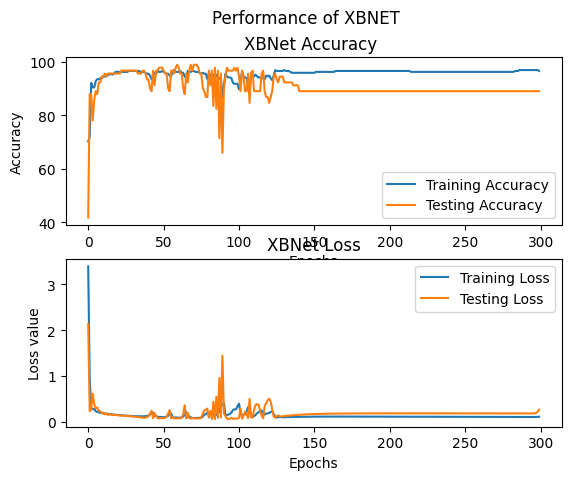

NameError: name 'x_data' is not defined

In [21]:
m,acc, lo, val_ac, val_lo = run_XBNET(x_train,x_test,y_train,y_test,model,criterion,optimizer,32,300)
print(predict(m,x_data.to_numpy()[0,:]))